                                                    Final Project
Project Overview: The purpose of this project is to study the relationship between interest rate and unemployment rate. History shows that there is unemployment tends to be higher with higher interest rates. Higher interest rates can slow down the inflation but higher unemployment rate also means people's demand for goods decrease. This project is going to prove the direct relationship between interest rate and unemployment rate.


Project Structure: This project is split into three sections:

The first section will provide a data report, which will explain where the data comes from.

The second section consists of time series data of the effective federal funds rate (interest rate) and the unemployment rate.

The third section will state a hypothesis. A linear regression analysis will be used to test the hypothesis and show the results. There will be a follow-up analysis on our results.


Data Report:

The data for this project comes from the Federal Reserve Economic Data (FRED). FRED provides monthly data on the U.S.'s effective federal funds rate and the unemployment rate from 1948 and onwards. It will also identify times of economic contractions. The data can be accessed at http://https://fred.stlouisfed.org/


Important variables:

The two main key variables for this project are the effective federal funds rate and the unemployment rate.

FRED defines the effective federal funds rate in two main ways: "The federal funds is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight... The federal funds rate is the central interest rate in the U.S. financial market. It influences other interest rates such as the prime rate, which is the rate banks charge their customers with higher credit ratings. Additionally, the federal funds rate indirectly influences longer- term interest rates such as mortgages, loans, and savings, all of which are very important to consumer wealth and confidence.(2)"

FRED defines the unemployment rate as the "number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.

In [26]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [27]:
#Access Data
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [28]:
data.columns = ['DATE','URATE']

In [29]:
data.head()

,DATE,URATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [30]:
#Summary Statistics for Unemployment Rate
data.describe()

,URATE
count,874.000000
mean,5.764302
std,1.708065
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


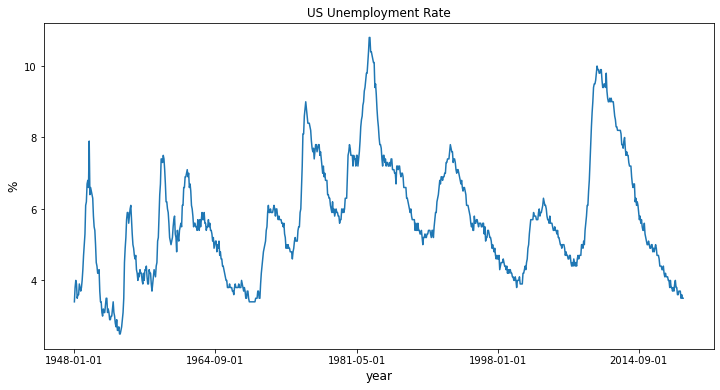

In [31]:
#Graphing the Unemployment Rate
data1=data.set_index('DATE')
ax = data1['1948':'2020'].plot(title='US Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [32]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/FEDFUNDS/downloaddata/FEDFUNDS.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.head()

,DATE,VALUE
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [33]:
data_r.columns=['DATE', 'FFR']
data_r.head()

,DATE,FFR
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [34]:
#Summary Statistics for FFR
data_r.describe()

,FFR
count,796.000000
mean,4.718794
std,3.603650
min,0.050000
25%,1.980000
50%,4.305000
75%,6.502500
max,19.100000


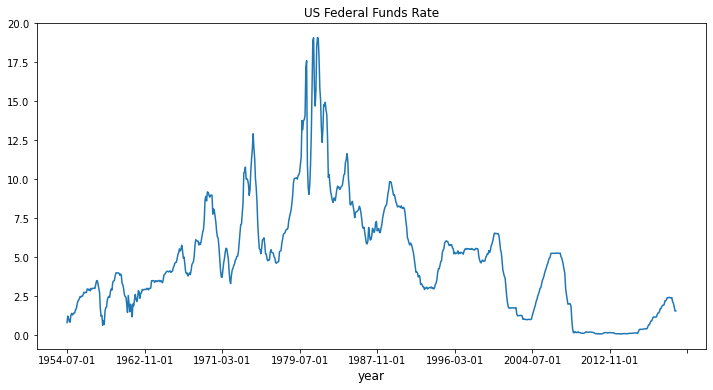

In [35]:
#Graphing Federal Funds Rate
data_r1=data_r.set_index('DATE')
ax = data_r1['1954':'2020'].plot(title='US Federal Funds Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [36]:
data_merge=pd.merge(data, data_r, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [37]:
data_merge.head()

,DATE,URATE,FFR
0,1954-07-01,5.8,0.80
1,1954-08-01,6.0,1.22
2,1954-09-01,6.1,1.07
3,1954-10-01,5.7,0.85
4,1954-11-01,5.3,0.83


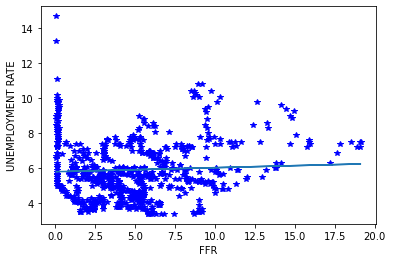

In [38]:
from numpy.polynomial.polynomial import polyfit
fig,ax=plt.subplots()
ax.plot(data_merge['FFR'],data_merge['URATE'],'b*')
ax.set_xlabel("FFR")
ax.set_ylabel("UNEMPLOYMENT RATE")
b,m=polyfit(data_merge['FFR'],data_merge['URATE'],1)
ax.plot(data_merge['FFR'],b+m*data_merge['FFR'],'-')

In [39]:
m

0.023201637495055754

Regression Analysis

We want to establish a relationship between the unemployment rate and the federal funds rate. We will run a linear regression. 

In [40]:
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['FFR'], data_merge['URATE'])
gradient, intercept, std_err, p_value

(0.023201637495055723,
 5.812501177520818,
 0.01631136014234609,
 0.15529650578351203)

From the regression results, we establish a positive relationship between unemployment rate and federal funds rate, even though we find the results to not be statistically significant. 

Story:...

In [41]:
#Test for the relationship between the unemployment rate and the federal funds rate
gradient, intercept, r_value, p_value, std_err = linregress(data_merge['FFR'], data_merge['URATE'])
gradient, intercept, std_err, p_value

(0.023201637495055723,
 5.812501177520818,
 0.01631136014234609,
 0.15529650578351203)

In [42]:
#Regression of unemployment rate on inflation rate and federal funds rate.
data_merge['const'] = 1
reg1 = sm.OLS(endog=data_merge['URATE'], exog=data_merge[['const','FFR']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [43]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  URATE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.023
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.155
Time:                        23:09:43   Log-Likelihood:                -1530.6
No. Observations:                 796   AIC:                             3065.
Df Residuals:                     794   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8125      0.097     60.031      0.0